# Hand Gesture Recognition

Group:

2440007226 - Eduardo Brilliandy

2440016672 - Javier Islamey

## Import Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import keras

## Get image list from dataset

In [2]:
path = './HandGesture/images'

path_list = os.listdir(path)

image_list = []
image_class_id = []

for class_path in path_list:
    image_path_list = os.listdir(path + '/' + class_path)
    for image_path in image_path_list:
        image_list.append(path + '/' + class_path + '/' + image_path)
        image_class_id.append(class_path)

print(len(image_list))

5243


In [3]:
print(image_list[0])
print(image_class_id[0])

./HandGesture/images/call_me/1055.jpg
call_me


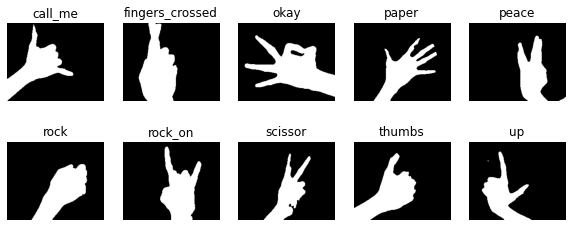

In [4]:
plt.figure(figsize=(10, 4))
for i, index in enumerate(range(250, 5000, 500)):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv.imread(image_list[index]))
    plt.title(image_class_id[index])
    plt.axis('off')

plt.show()

## Preprocessing

In [5]:
x = []
y = []
count = 0
for image in image_list:
    img = cv.imread(image, 0)
    img = cv.resize(img, (128,128), interpolation = cv.INTER_AREA)
    img = img.reshape(128,128,1)
    x.append(img)
    count = count+1

x = np.array(x)

y = image_class_id
y = np.array(y)
y = y.reshape(count, 1)

print(x.shape)
print(y.shape)
print(count)

(5243, 128, 128, 1)
(5243, 1)
5243


In [6]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()
print(y.shape)

(5243, 10)


In [7]:
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
enc.categories_

[array(['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock',
        'rock_on', 'scissor', 'thumbs', 'up'], dtype='<U15')]

## Split the Dataset

80% training, 10% validation, 10% testing

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x,y,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

## Build CNN model

In [10]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(128, 128,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (5, 5), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

## Train the CNN model

In [11]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/50
66/66 [==============================] - 13s 176ms/step - loss: 6.7471 - accuracy: 0.1187 - val_loss: 2.2634 - val_accuracy: 0.1450
Epoch 2/50
66/66 [==============================] - 11s 174ms/step - loss: 2.1807 - accuracy: 0.1798 - val_loss: 1.9530 - val_accuracy: 0.3683
Epoch 3/50
66/66 [==============================] - 13s 189ms/step - loss: 1.8282 - accuracy: 0.3531 - val_loss: 1.3963 - val_accuracy: 0.6050
Epoch 4/50
66/66 [==============================] - 11s 174ms/step - loss: 1.3827 - accuracy: 0.5196 - val_loss: 0.7306 - val_accuracy: 0.8092
Epoch 5/50
66/66 [==============================] - 12s 185ms/step - loss: 0.9809 - accuracy: 0.6638 - val_loss: 0.5647 - val_accuracy: 0.8454
Epoch 6/50
66/66 [==============================] - 12s 175ms/step - loss: 0.7733 - accuracy: 0.7310 - val_loss: 0.3810 - val_accuracy: 0.8912
Epoch 7/50
66/66 [==============================] - 11s 172ms/step - loss: 0.6101 - accuracy: 0.7938 - val_loss: 0.2964 - val_accuracy: 0.9198

## Evaluate the CNN model

In [12]:
loss, acc = model.evaluate(x_test,y_test)
print("Accuracy:" + str(acc))
print("Loss:" + str(loss))

17/17 [==============================] - 0s 18ms/step - loss: 0.0739 - accuracy: 0.9829
Accuracy:0.9828571677207947
Loss:0.07391177117824554


## Show Accuracy & Loss

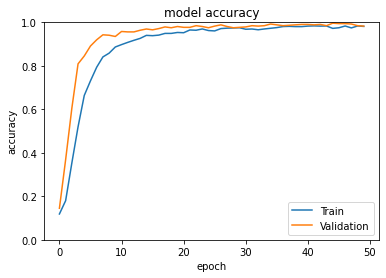

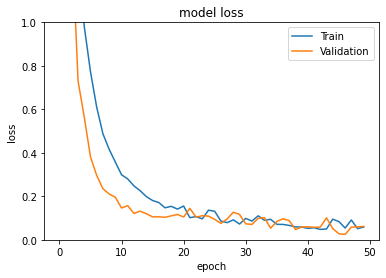

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Show model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0

## Save the model

In [15]:
model.save("model.h5")